In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('C:/Users/akshi/OneDrive/Desktop/DA/Ai jobs/resume_data.csv')
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(".", "_")
)


In [7]:
df.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educational_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities_1', 'skills_required',
       'matched_score'],
      dtype='object')

In [8]:
relevant_cols = [
    "skills",
    "certification_skills",
    "skills_required",
    "degree_names",
    "major_field_of_studies",
    "matched_score"
]

df = df[relevant_cols]


In [9]:
df.isna().sum()


skills                      56
certification_skills      7536
skills_required           1701
degree_names                84
major_field_of_studies      84
matched_score                0
dtype: int64

In [39]:
df["skills"] = df["skills"].apply(
    lambda skills: [s.lower().strip() for s in skills]
)


In [40]:
skill_cols = ["skills", "certification_skills", "skills_required"]

for col in skill_cols:
    df[col] = df[col].fillna("")

df["degree_names"] = df["degree_names"].fillna("Unknown")


In [41]:
type(df['skills'][0])


list

In [42]:
df.head()

,skills,certification_skills,skills_required,degree_names,major_field_of_studies,matched_score,total_skill_count,required_skill_overlap,has_degree,degree_count,skill_degree_ratio
0,"[big data, hadoop, hive, python, mapreduce, sp...",[],[],['B.Tech'],['Electronics'],0.850000,21,0,1,10,1.909091
1,"[data analysis, data analytics, business analy...",[],[],"['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['Mathematics', 'Statistics']",0.750000,10,0,1,47,0.208333
2,"[software development, machine learning, deep ...",[],[],['B.Tech'],['Electronics/Telecommunication'],0.416667,14,0,1,10,1.272727
3,"[accounts payables, accounts receivables, acco...",[],[],['Computer Applications Specialist Certificate...,['Computer Applications'],0.760000,36,0,1,56,0.631579
4,"[analytical reasoning, compliance testing know...",[None],[],['Bachelor of Business Administration'],['Accounting'],0.650000,32,0,1,39,0.800000


In [43]:
df['skills'].apply(type).value_counts()


skills
<class 'list'>    9544
Name: count, dtype: int64

In [44]:
df["total_skill_count"] = df["skills"].apply(len)


In [45]:
#required skill match
def skill_overlap(row):
    return len(set(row["skills"]) & set(row["skills_required"]))

df["required_skill_overlap"] = df.apply(skill_overlap, axis=1)


In [46]:
df["has_degree"] = df["degree_names"].apply(
    lambda x: 0 if x == ["Unknown"] or len(x) == 0 else 1
)


In [47]:
df["degree_count"] = df["degree_names"].apply(len)


In [48]:
#skill vs Degree strength ratio
df["skill_degree_ratio"] = df["total_skill_count"] / (df["degree_count"] + 1)


In [49]:
df[
    [
        "total_skill_count",
        "required_skill_overlap",
        "has_degree",
        "degree_count",
        "skill_degree_ratio",
        "matched_score",
    ]
].head()


,total_skill_count,required_skill_overlap,has_degree,degree_count,skill_degree_ratio,matched_score
0,21,0,1,10,1.909091,0.850000
1,10,0,1,47,0.208333,0.750000
2,14,0,1,10,1.272727,0.416667
3,36,0,1,56,0.631579,0.760000
4,32,0,1,39,0.800000,0.650000


In [50]:
df[["total_skill_count", "matched_score"]].corr()
#High positive correlation (> 0.4) → skill quantity bias
#Low correlation (< 0.2) → skills used reasonably


,total_skill_count,matched_score
total_skill_count,1.000000,0.102134
matched_score,0.102134,1.000000


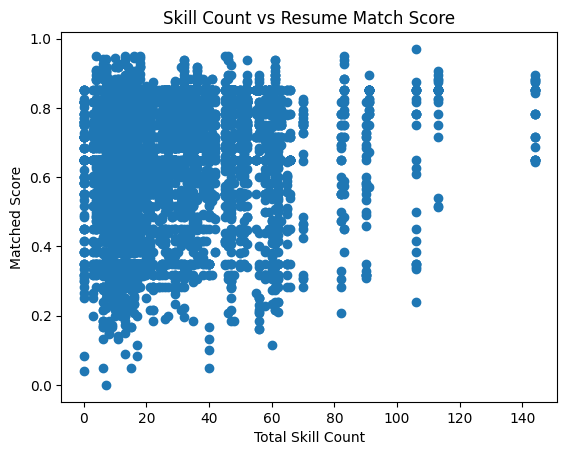

In [51]:
import matplotlib.pyplot as plt

plt.scatter(df["total_skill_count"], df["matched_score"])
plt.xlabel("Total Skill Count")
plt.ylabel("Matched Score")
plt.title("Skill Count vs Resume Match Score")
plt.show()


In [52]:
skill_df = df.explode("skills")


In [53]:
skill_df.head(10)


,skills,certification_skills,skills_required,degree_names,major_field_of_studies,matched_score,total_skill_count,required_skill_overlap,has_degree,degree_count,skill_degree_ratio
0,big data,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,hadoop,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,hive,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,python,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,mapreduce,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,spark,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,java,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,machine learning,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,cloud,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091
0,hdfs,[],[],['B.Tech'],['Electronics'],0.85,21,0,1,10,1.909091


In [54]:
skill_bias = (
    skill_df
    .groupby("skills")["matched_score"]
    .mean()
    .sort_values(ascending=False)
)


In [55]:
skill_bias.head(15)


skills
environmental protection               0.863274
environmental science                  0.863274
database design                        0.863274
process development and engineering    0.863274
data warehouse                         0.863274
curriculum development                 0.863274
microsoft sql                          0.863274
asp.net 4.5                            0.863274
project management lifecycle           0.850595
microsoft teams                        0.850595
sales force                            0.850595
ad copy                                0.850595
engineering projects                   0.850595
advertisements                         0.850595
dynamic ax                             0.850595
Name: matched_score, dtype: float64

In [56]:
df.groupby("has_degree")["matched_score"].mean()


has_degree
1    0.660831
Name: matched_score, dtype: float64

In [57]:
df[["total_skill_count", "has_degree", "matched_score"]].corr()


,total_skill_count,has_degree,matched_score
total_skill_count,1.000000,NaN,0.102134
has_degree,NaN,NaN,NaN
matched_score,0.102134,NaN,1.000000


In [58]:
df.to_csv("candidate_bias_features.csv", index=False)


In [59]:
skill_bias.reset_index().to_csv("skill_bias_summary.csv", index=False)
